# Q1 : Explore clinical variables

## 1.1 Import and explore the clinical data

In [1]:
library(readr)

In [3]:
#import TSV file into data frame
clinical_data <- read_tsv('Aorta/clinical_data.tsv')

Rows: 280 Columns: 14
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): SMPLID, SUBJID, COHORT, SMPTHNTS, SMPLID.1, IMGURL
dbl (8): SEX, AGE, HGHT, WGHT, BMI, TRISCHD, DTHVNT, DTHHRDY

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [35]:
head(clinical_data, 3)

SMPLID,SUBJID,COHORT,SEX,AGE,HGHT,WGHT,BMI,TRISCHD,DTHVNT,DTHHRDY,SMPLID.1,IMGURL
<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
GTEX.111YS.0526,GTEX.111YS,Organ Donor (OPO),1,62,72,227,30.78,74,1,0,GTEX-111YS-0525,https://brd.nci.nih.gov/brd/specimen/GTEX-111YS-0526
GTEX.1122O.1126,GTEX.1122O,Organ Donor (OPO),2,64,66,203,32.76,35,1,0,GTEX-1122O-1125,https://brd.nci.nih.gov/brd/specimen/GTEX-1122O-1126
GTEX.1128S.0326,GTEX.1128S,Postmortem,2,66,66,160,25.82,816,0,2,GTEX-1128S-0325,https://brd.nci.nih.gov/brd/specimen/GTEX-1128S-0326


In [5]:
summary(clinical_data)

    SMPLID             SUBJID             COHORT               SEX       
 Length:280         Length:280         Length:280         Min.   :1.000  
 Class :character   Class :character   Class :character   1st Qu.:1.000  
 Mode  :character   Mode  :character   Mode  :character   Median :1.000  
                                                          Mean   :1.357  
                                                          3rd Qu.:2.000  
                                                          Max.   :2.000  
      AGE             HGHT            WGHT            BMI       
 Min.   :21.00   Min.   :58.00   Min.   : 92.0   Min.   :18.58  
 1st Qu.:48.00   1st Qu.:65.00   1st Qu.:155.8   1st Qu.:24.33  
 Median :56.00   Median :68.00   Median :176.4   Median :27.29  
 Mean   :53.64   Mean   :67.85   Mean   :179.7   Mean   :27.35  
 3rd Qu.:64.00   3rd Qu.:71.00   3rd Qu.:202.9   3rd Qu.:30.67  
 Max.   :70.00   Max.   :77.00   Max.   :273.8   Max.   :34.99  
   SMPTHNTS            TRIS

In [36]:
library(dplyr)

We would like to have the character variable into factors

In [11]:
# Convert character columns to factors using dplyr
clinical_data <- clinical_data %>%
  mutate_if(is.character, as.factor)

The problem is that some categorical variables are still considered as double (SEX and DTHHRDY)

In [88]:
# Convert SEX, DTHHRDY and DTHVNT to factors
clinical_data$SEX <- as.factor(clinical_data$SEX)
clinical_data$DTHHRDY <- as.factor(clinical_data$DTHHRDY)
clinical_data$DTHVNT <- as.factor(clinical_data$DTHVNT)

In [89]:
summary(clinical_data)

             SMPLID           SUBJID                  COHORT    SEX    
 GTEX.111YS.0526:  1   GTEX.111YS:  1   Organ Donor (OPO):143   1:180  
 GTEX.1122O.1126:  1   GTEX.1122O:  1   Postmortem       :137   2:100  
 GTEX.1128S.0326:  1   GTEX.1128S:  1                                  
 GTEX.117XS.0426:  1   GTEX.117XS:  1                                  
 GTEX.117YW.0226:  1   GTEX.117YW:  1                                  
 GTEX.11DXX.0426:  1   GTEX.11DXX:  1                                  
 (Other)        :274   (Other)   :274                                  
      AGE             HGHT            WGHT            BMI       
 Min.   :21.00   Min.   :58.00   Min.   : 92.0   Min.   :18.58  
 1st Qu.:48.00   1st Qu.:65.00   1st Qu.:155.8   1st Qu.:24.33  
 Median :56.00   Median :68.00   Median :176.4   Median :27.29  
 Mean   :53.64   Mean   :67.85   Mean   :179.7   Mean   :27.35  
 3rd Qu.:64.00   3rd Qu.:71.00   3rd Qu.:202.9   3rd Qu.:30.67  
 Max.   :70.00   Max.   :77.00   M

Everything looks fine with the clinical dataset. We can also see that we have only "NO_REPORT" for the SMPTHNTS variable. We can remove it from the dataset to have a bit more clarity.

In [39]:
# Remove the SMPTHNTS column
clinical_data$SMPTHNTS <- NULL

We are good to go !

## 1.2 How are clinical variables distributed ?

In [ ]:
library(ggplot2)

### 1.2.1 Distribution of numerical variables 

There are 5 numerical variables : AGE, HGHT, WGHT, BMI and TRISCHD

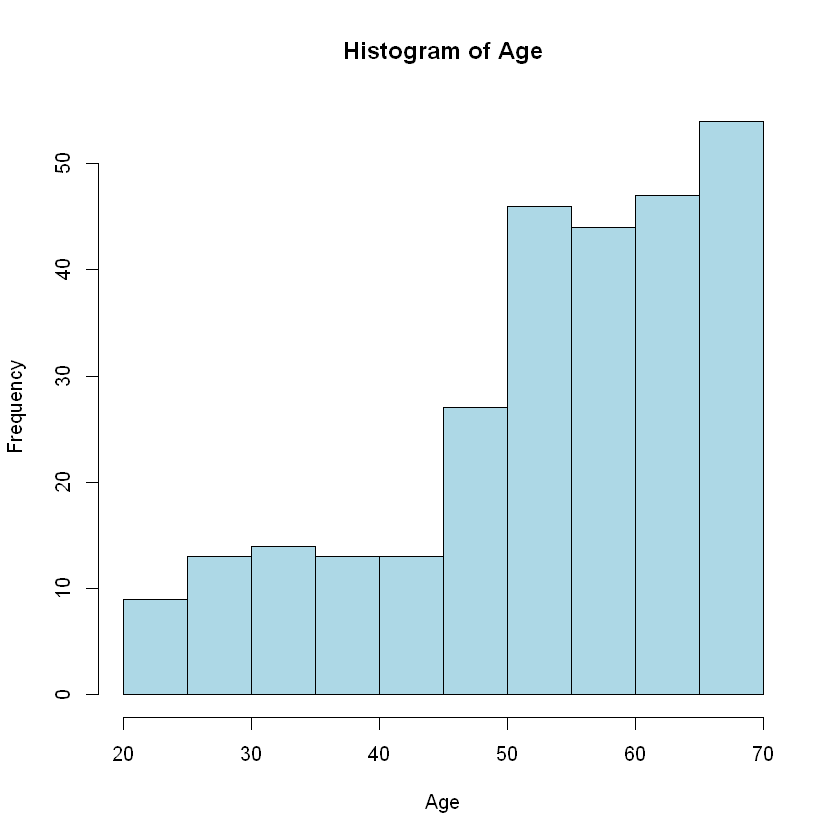

In [45]:
# Histograms for numerical variables
hist(clinical_data$AGE, main="Histogram of Age", xlab="Age", col="lightblue")

The dataset is represented by a bigger proportion of old person in GTEx as discussed during the theoritical course. 

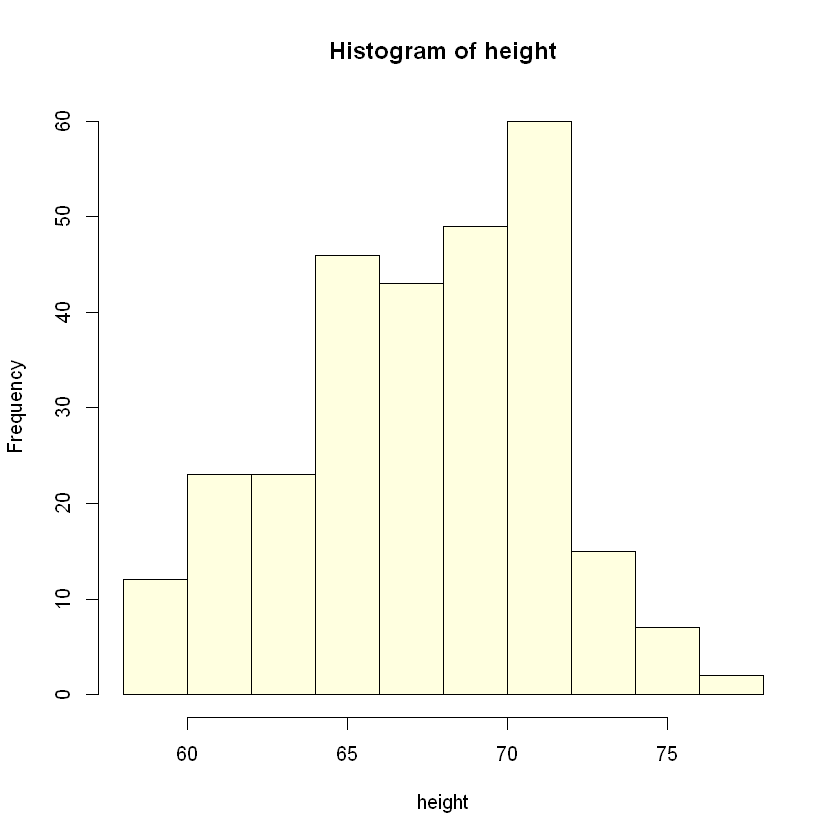

In [52]:
# Histograms for numerical variables
hist(clinical_data$HGHT, main="Histogram of height", xlab="height", col="lightyellow")

Normal distribution of the height

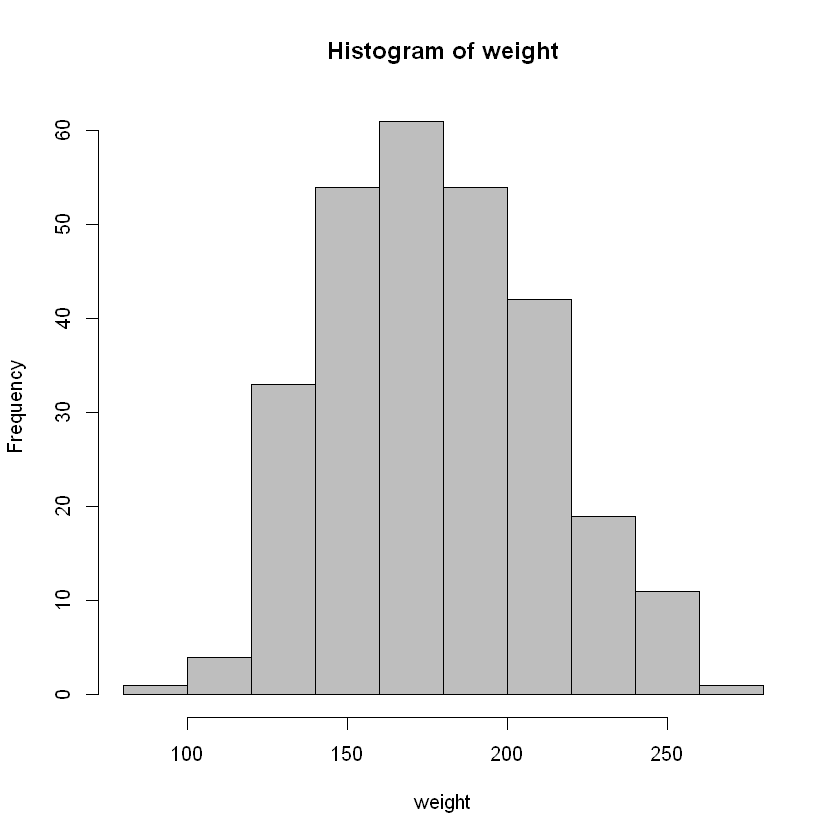

In [55]:
# Histograms for numerical variables
hist(clinical_data$WGHT, main="Histogram of weight", xlab="weight", col="gray")

Normal distribution of the weight

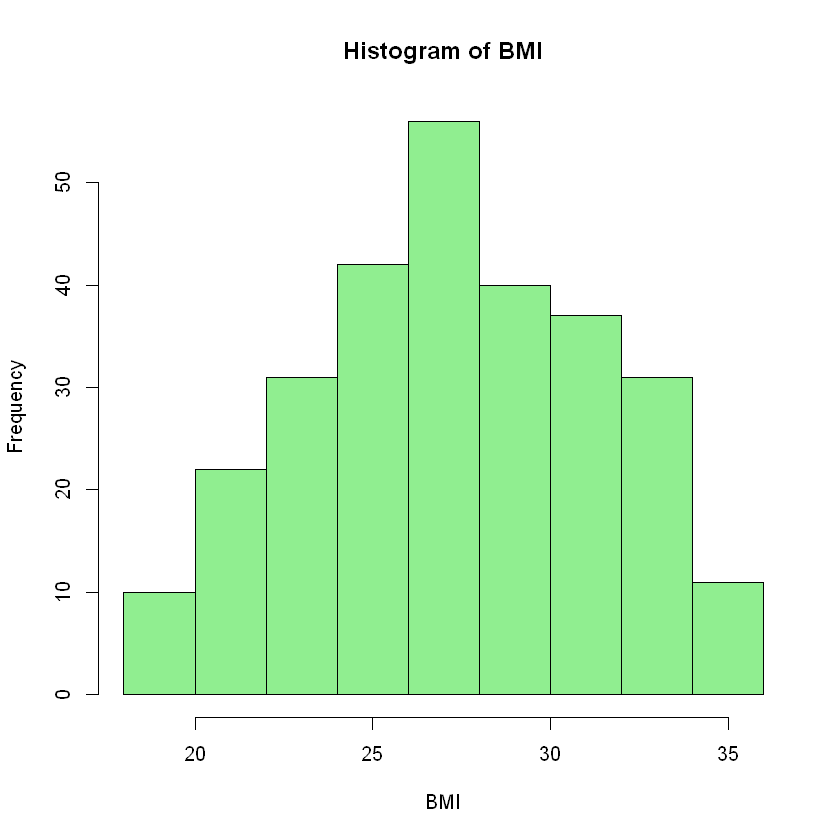

In [54]:
hist(clinical_data$BMI, main="Histogram of BMI", xlab="BMI", col="lightgreen")

We also have a normal distribution of the BMI.

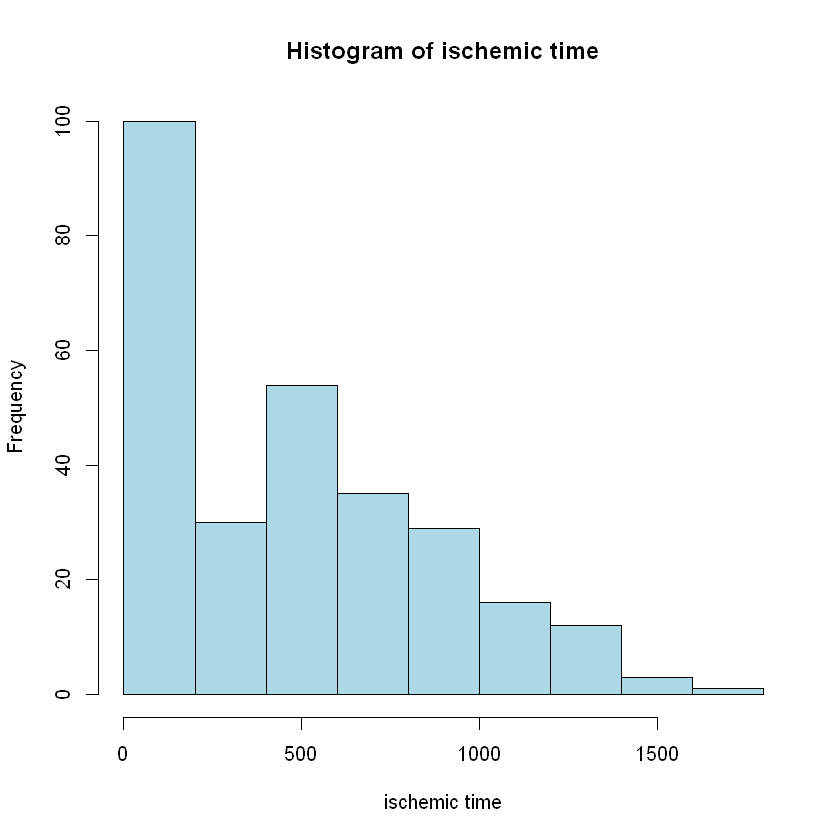

In [58]:
hist(clinical_data$TRISCHD, main="Histogram of ischemic time", xlab="ischemic time", col="lightblue")

We can see that we have a large number of people with very small ischemic time. We can explain that by looking at the variable COHORT. We have a quite equal repartition of organ donor and post mortem patients (143 vs 137). The 143 organ donors will have a low ischemic time (often less than 1 hour) which leads to a large proportion of people with an ischemic time between 0 and 60 minutes. However, the ischemic time of post portem patients will be way more disparate as we can see on the histogram. 

In [60]:
install.packages("ggplot2")
library(ggplot2)

Installation du package dans 'C:/Users/Arthur/AppData/Local/R/win-library/4.3'
(car 'lib' n'est pas spécifié)



le package 'ggplot2' a été décompressé et les sommes MD5 ont été vérifiées avec succés

Les packages binaires téléchargés sont dans
	C:\Users\Arthur\AppData\Local\Temp\RtmpYFld7t\downloaded_packages


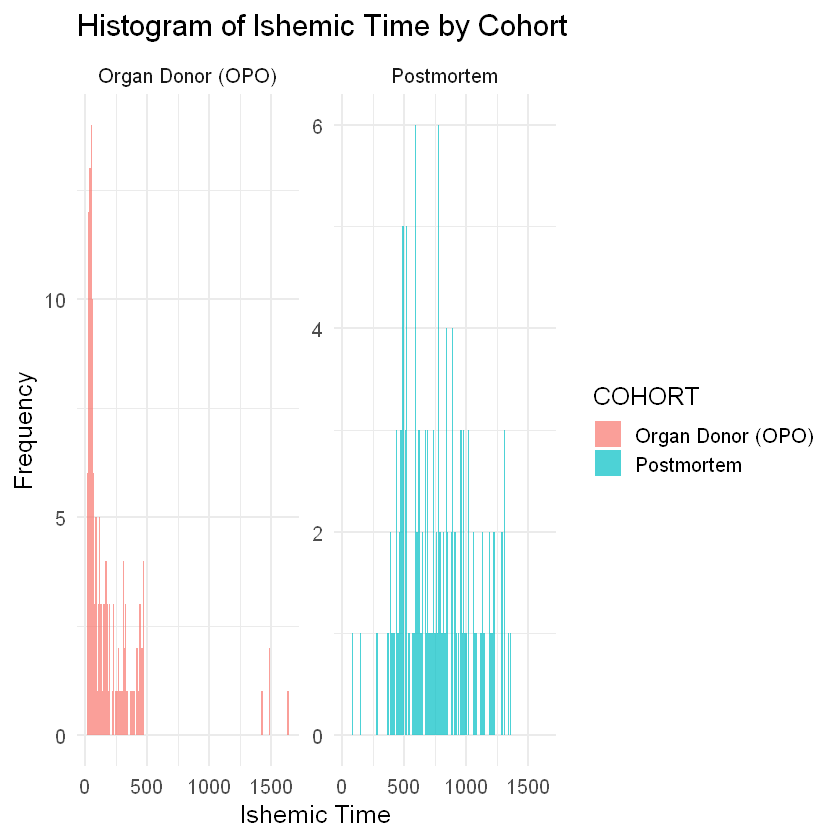

In [76]:
ggplot(clinical_data, aes(x = TRISCHD, fill = COHORT)) +
  geom_histogram(binwidth = 10, alpha = 0.7, position = "identity") +
  facet_wrap(~ COHORT, scales = "free_y") +
  labs(title = "Histogram of Ishemic Time by Cohort",
       x = "Ishemic Time",
       y = "Frequency") +
  theme_minimal(base_size = 15)

We can see that indeed, the organ donor have the propensity to have lower ischemic time of Post mortem persons and that the distribution has less variation and is skewed to the left compared to Post mortem. 

We could also use boxplots to show the distribution but we thought that histograms were sufficients.

### 1.2.2 Distribution of categorical variables 

They are 4 categorical variables : SEX, COHORT, DTHHRDY and DTHVNT.


  1   2 
180 100 

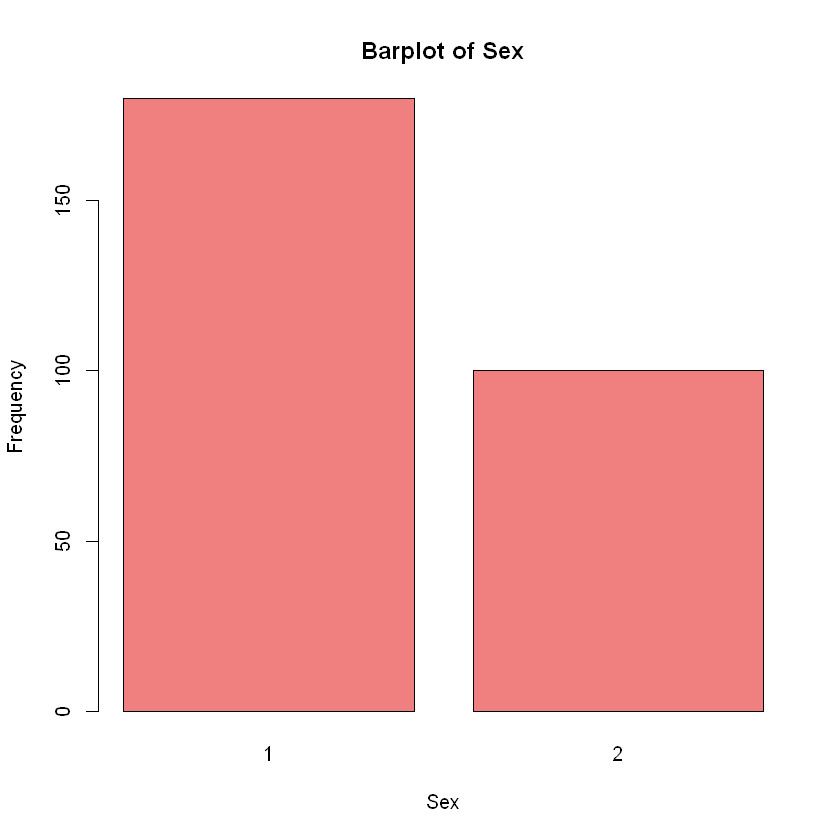

In [98]:
# Frequency table and barplot for SEX
table(clinical_data$SEX)
barplot(table(clinical_data$SEX), main="Barplot of Sex", xlab="Sex", ylab="Frequency", col="lightcoral")

We can see that we have 180 males (1) and 100 females (2) in our dataset of 280 samples which is almost twice more males than females. 


Organ Donor (OPO)        Postmortem 
              143               137 

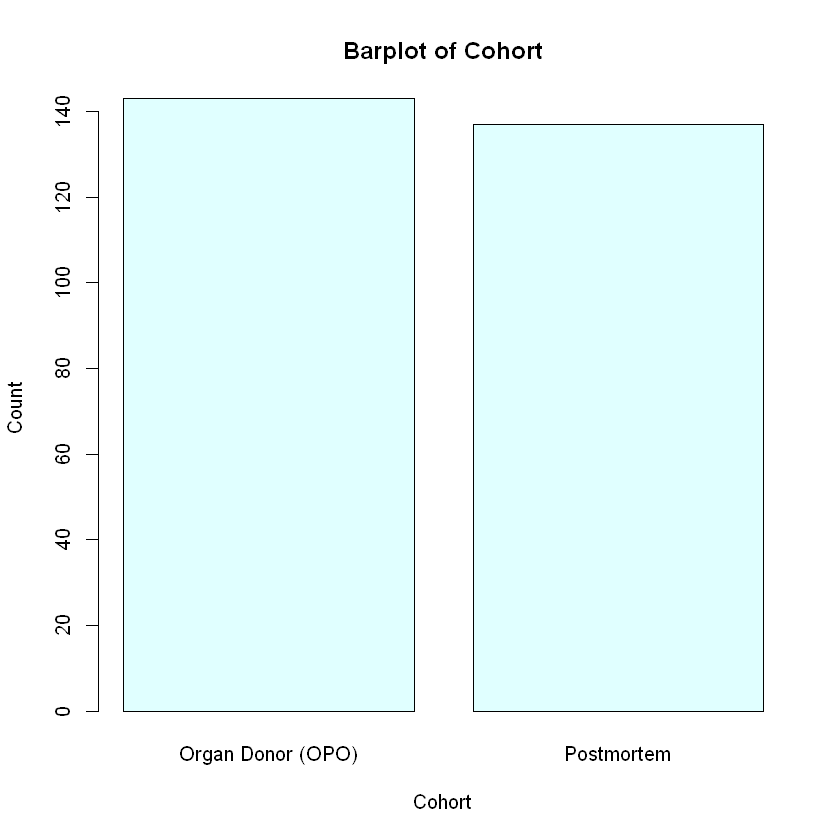

In [100]:
# Frequency table and barplot for COHORT
table(clinical_data$COHORT)
barplot(table(clinical_data$COHORT), main="Barplot of Cohort", xlab="Cohort", ylab="Count", col="lightcyan")

We almost have an equal repartition of Organ donor (OPO) and Post mortem patients. 


  0   1   2   3   4 
156   8  77  13  26 

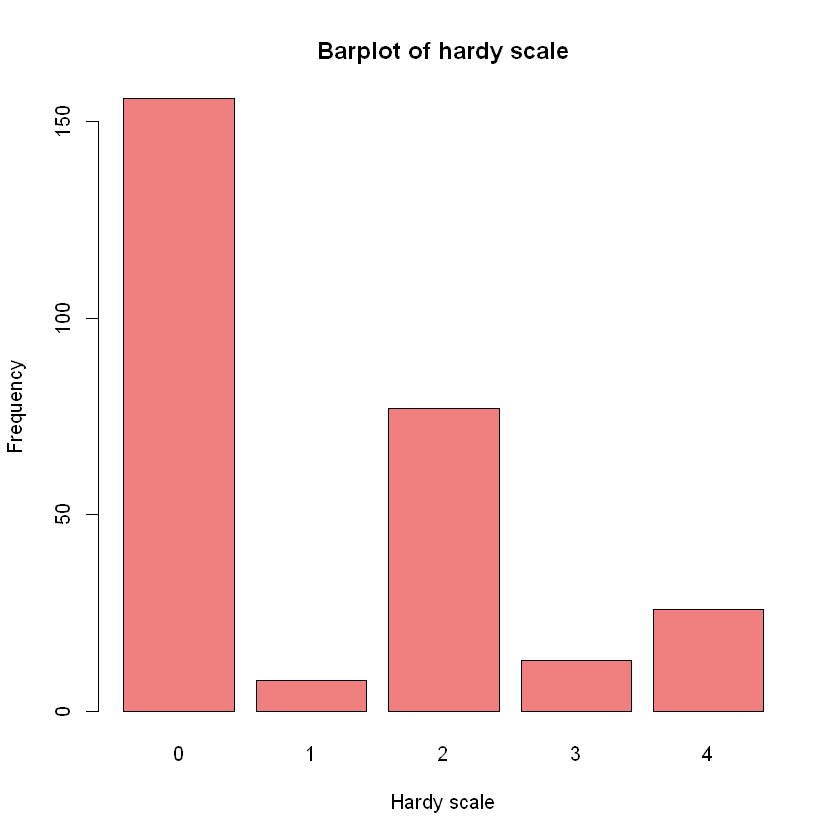

In [107]:
# Frequency table and barplot for DTHHRDY
table(clinical_data$DTHHRDY)
barplot(table(clinical_data$DTHHRDY), main="Barplot of hardy scale", xlab="Hardy scale", ylab="Frequency", col="lightcoral")

DTHHRDY variable corresponds to the hardy scale i.e. the circumstances of death which is summarized by a factor from 0 to 4 where 0 = Ventilator case, 1 = Violent and fast death, 2 = Fast death of natural causes, 3 = Intermediate death and 4 = slow death. 

The highest circumstances frequency of death is from ventilator case (156) followed by fast death of natural causes (77), then by slow death (26), then by intermediate death (13) and finally by violent and fast death (8)


  0   1  99 
116 162   2 

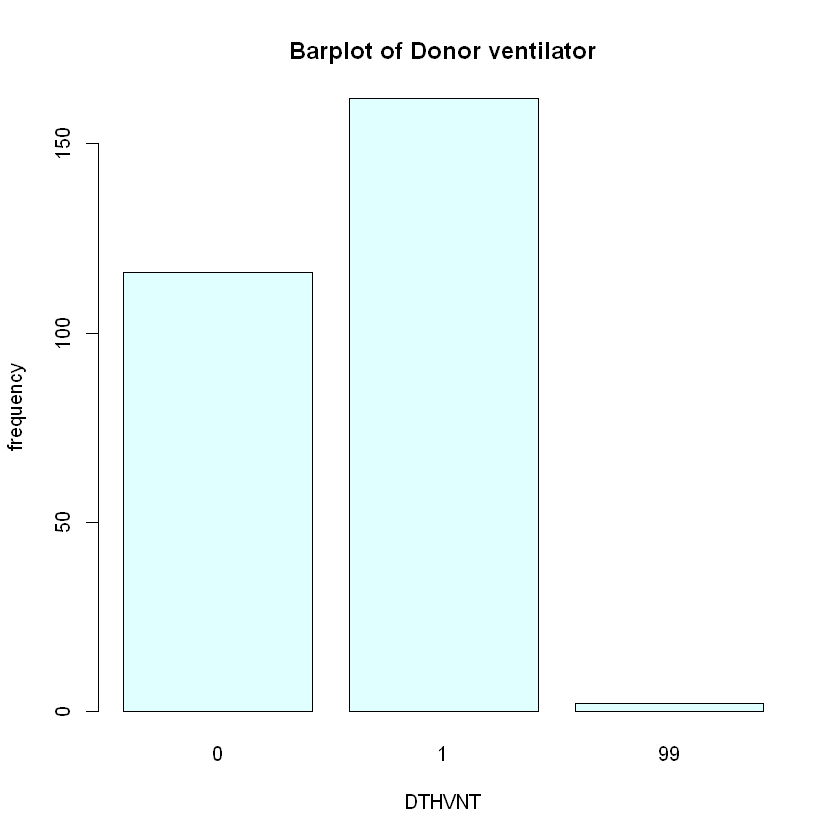

In [105]:
# Frequency table and barplot for DTHVNT
table(clinical_data$DTHVNT)
barplot(table(clinical_data$DTHVNT), main="Barplot of Donor ventilator", xlab="DTHVNT", ylab="frequency", col="lightcyan")

DTHVNT variable gives the information if the donor was on a ventilator (medical device) immediatly prior to death which is summarized by four differents factors : 0 = No, 1 = Yes, 98 = Not reported and 99 = Unknown. 

We can see that we have 162 patients that have been under a ventilator before death, 116 which were not and 2 that are unknown. 

## 1.3 How are clinical variables correlated ?

### 1.3.1 Correlations between numerical variables

In [ ]:
We can start by exploring the correlation between the 5 numerical variables. 

In [111]:
# The variables from the 5th column to 9th column are the 5 numerical variables
numerical_clinical_data<-clinical_data[c(5:9)]
head(numerical_clinical_data)

AGE,HGHT,WGHT,BMI,TRISCHD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
62,72.0,227,30.78,74
64,66.0,203,32.76,35
66,66.0,160,25.82,816
64,71.0,220,30.68,848
58,72.0,220,29.83,785
66,64.5,128,21.63,56


In [112]:
dim(numerical_clinical_data)

[1] 280   5

,AGE,HGHT,WGHT,BMI,TRISCHD
AGE,1.00000000,0.064089264,0.0973484,0.071131909,0.22927245
HGHT,0.06408926,1.000000000,0.6121418,-0.006819023,0.14390524
WGHT,0.09734840,0.612141786,1.0000000,0.780945124,0.11913930
BMI,0.07113191,-0.006819023,0.7809451,1.000000000,0.03324977
TRISCHD,0.22927245,0.143905243,0.1191393,0.033249770,1.00000000


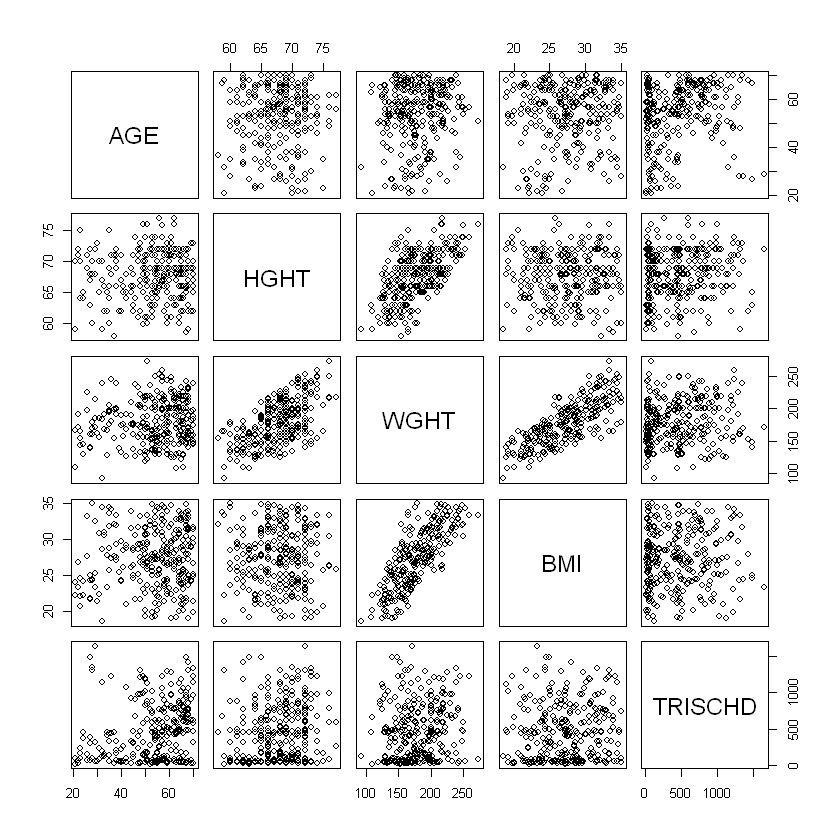

In [115]:
pairs(numerical_clinical_data)
cor(numerical_clinical_data)

AGE looks to be a little bit positively correlated to TRISCHD.

HGHT is highly positively correlated to WGHT which was expected as taller people have a higher tendency to be heavier. HGHT seems also to be a bit positively correlated to TRISCHD.

WGHT is highly positively correlated to HGHT (logical as HGHT is highly correlated to WGHT) and to BMI which is expected as heavier people tend to have a higher BMI. WGHT seems also to be a bit positively correlated to TRISCHD.

BMI is highly positively correlated to WGHT but not at all to TRISCHD.

As said above, TRISCHD is a little bit positively correlated to AGE, HGHT and WGHT. It suggests that older, taller and heavier people will tend to have an ischemic time a little bit higher than normal.

### 1.3.2 Correlations between numerical and categorical variables

We want to see if the value of the numerical variables depends somehow on the levels of the categorical variables.

As reminder the 5 numerical variables are AGE, HGHT, WGHT, BMI and TRISCHD and the 4 categorical variables are SEX, COHORT, DTHHRDY and DTHVNT.

Let's start by the AGE variable in fuction of the 4 categorical variables. 

#### 1.3.2.1 AGE

             Df Sum Sq Mean Sq F value Pr(>F)
SEX           1    362   362.1   2.278  0.132
Residuals   278  44189   159.0               


	Shapiro-Wilk normality test

data:  residuals(myAOV)
W = 0.92071, p-value = 4.878e-11



	Bartlett test of homogeneity of variances

data:  AGE by SEX
Bartlett's K-squared = 1.2393, df = 1, p-value = 0.2656



	Kruskal-Wallis rank sum test

data:  AGE by SEX
Kruskal-Wallis chi-squared = 1.9821, df = 1, p-value = 0.1592


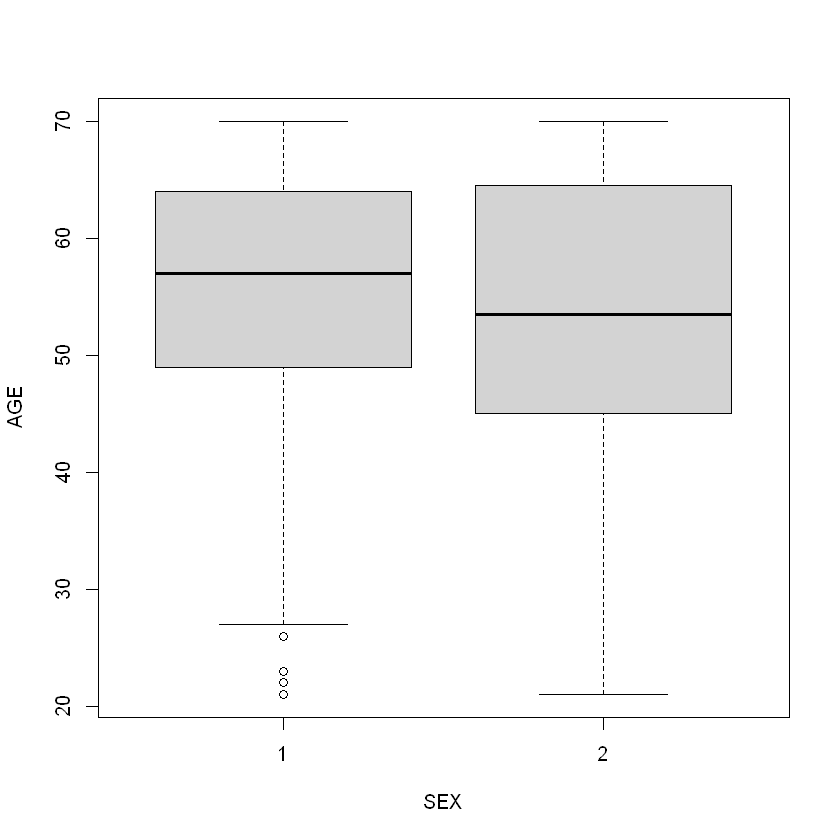

In [182]:
myAOV = aov(AGE ~ SEX, data=clinical_data)
summary(myAOV)
shapiro.test(residuals(myAOV))
bartlett.test(AGE ~ SEX, data=clinical_data)
kruskal.test(AGE ~ SEX, data=clinical_data)
boxplot(AGE ~ SEX, data=clinical_data)

The Pvalue of the Kruskal-Wallis test is 0.159  which is under the treshold of alpha = 5%. It means that the AGE mean does not depend on the sex. 

             Df Sum Sq Mean Sq F value   Pr(>F)    
COHORT        1   7021    7021   52.01 5.24e-12 ***
Residuals   278  37529     135                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


	Shapiro-Wilk normality test

data:  residuals(myAOV)
W = 0.95599, p-value = 1.757e-07



	Bartlett test of homogeneity of variances

data:  AGE by COHORT
Bartlett's K-squared = 17.72, df = 1, p-value = 2.559e-05



	Kruskal-Wallis rank sum test

data:  AGE by COHORT
Kruskal-Wallis chi-squared = 42.838, df = 1, p-value = 5.947e-11


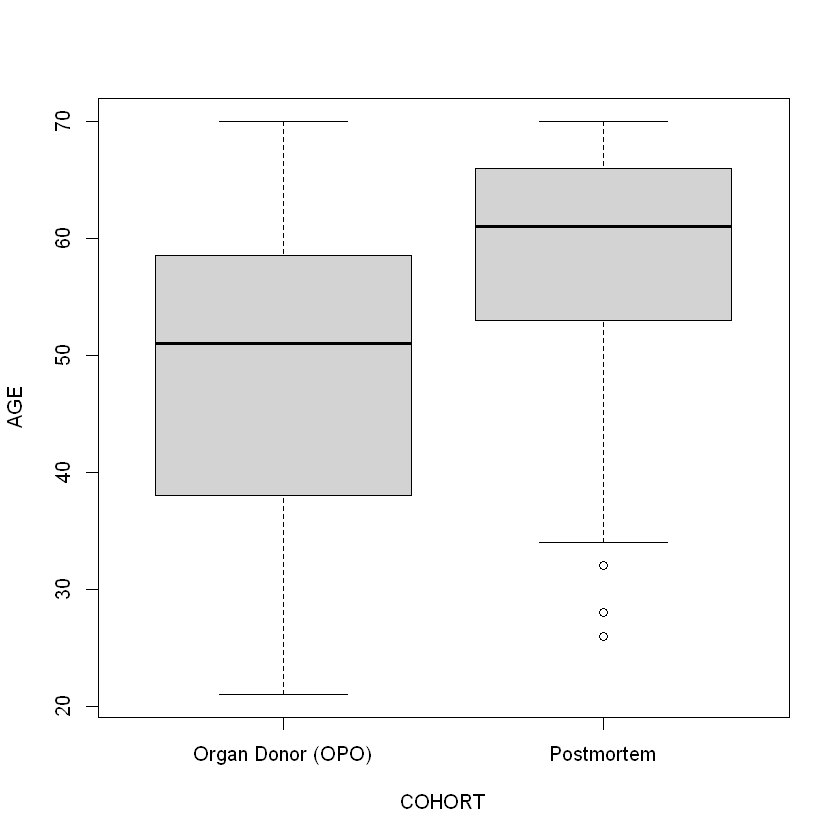

In [178]:
myAOV = aov(AGE ~ COHORT, data=clinical_data)
summary(myAOV)
shapiro.test(residuals(myAOV))
bartlett.test(AGE ~ COHORT, data=clinical_data)
kruskal.test(AGE ~ COHORT, data=clinical_data)
boxplot(AGE ~ COHORT, data=clinical_data)

             Df Sum Sq Mean Sq F value   Pr(>F)    
DTHHRDY       4   9161  2290.2    17.8 5.25e-13 ***
Residuals   275  35390   128.7                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


	Shapiro-Wilk normality test

data:  residuals(myAOV)
W = 0.97256, p-value = 3.331e-05



	Bartlett test of homogeneity of variances

data:  AGE by DTHHRDY
Bartlett's K-squared = 53.138, df = 4, p-value = 7.972e-11



	Kruskal-Wallis rank sum test

data:  AGE by DTHHRDY
Kruskal-Wallis chi-squared = 53.759, df = 4, p-value = 5.912e-11


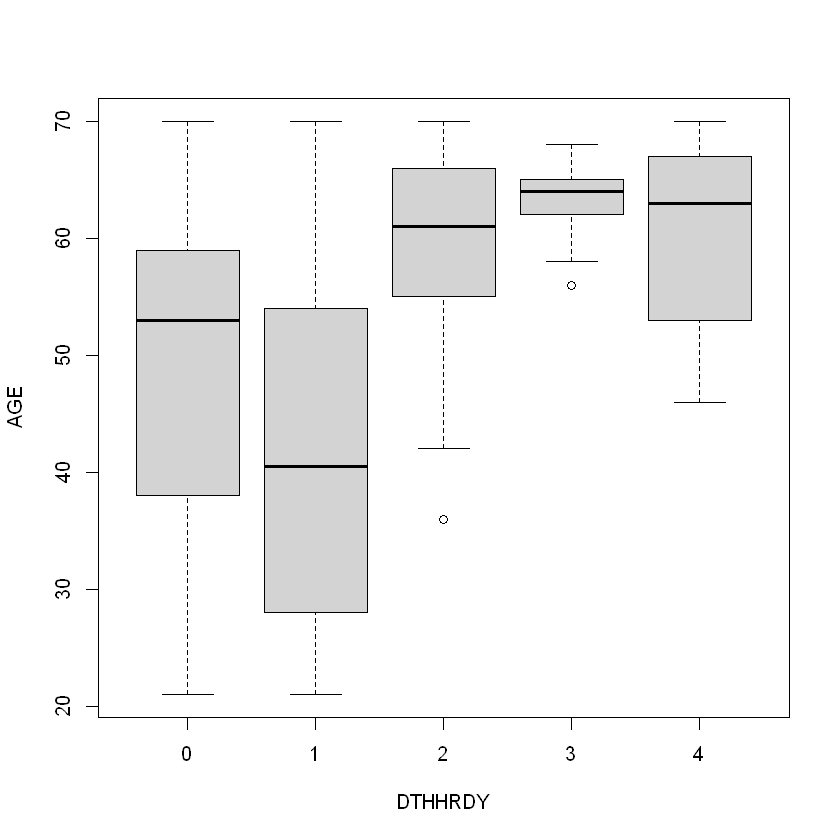

In [179]:
myAOV = aov(AGE ~ DTHHRDY, data=clinical_data)
summary(myAOV)
shapiro.test(residuals(myAOV))
bartlett.test(AGE ~ DTHHRDY, data=clinical_data)
kruskal.test(AGE ~ DTHHRDY, data=clinical_data)
boxplot(AGE ~ DTHHRDY, data=clinical_data)

             Df Sum Sq Mean Sq F value   Pr(>F)    
DTHVNT        2   6611    3305   24.13 2.18e-10 ***
Residuals   277  37940     137                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


	Shapiro-Wilk normality test

data:  residuals(myAOV)
W = 0.95513, p-value = 1.382e-07



	Bartlett test of homogeneity of variances

data:  AGE by DTHVNT
Bartlett's K-squared = 21.817, df = 2, p-value = 1.83e-05



	Kruskal-Wallis rank sum test

data:  AGE by DTHVNT
Kruskal-Wallis chi-squared = 40.537, df = 2, p-value = 1.576e-09


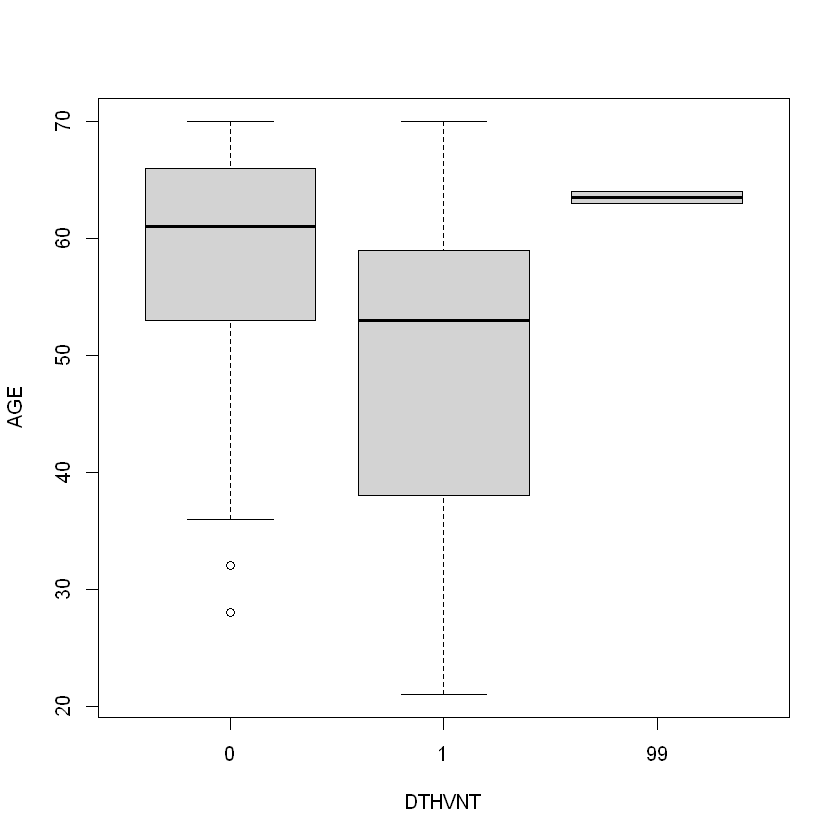

In [180]:
myAOV = aov(AGE ~ DTHVNT, data=clinical_data)
summary(myAOV)
shapiro.test(residuals(myAOV))
bartlett.test(AGE ~ DTHVNT, data=clinical_data)
kruskal.test(AGE ~ DTHVNT, data=clinical_data)
boxplot(AGE ~ DTHVNT, data=clinical_data)

#### 1.3.2.2 HGHT

             Df Sum Sq Mean Sq F value Pr(>F)    
SEX           1   2276  2275.7   290.3 <2e-16 ***
Residuals   278   2179     7.8                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


	Shapiro-Wilk normality test

data:  residuals(myAOV)
W = 0.97442, p-value = 6.562e-05



	Bartlett test of homogeneity of variances

data:  HGHT by SEX
Bartlett's K-squared = 0.84984, df = 1, p-value = 0.3566



	Kruskal-Wallis rank sum test

data:  HGHT by SEX
Kruskal-Wallis chi-squared = 147.65, df = 1, p-value < 2.2e-16


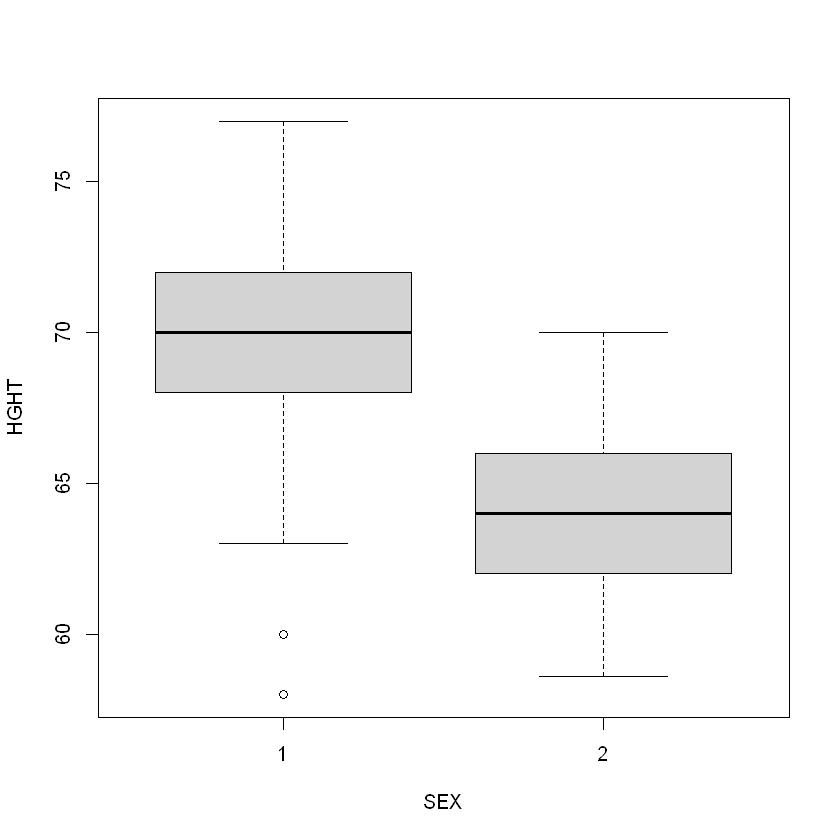

In [181]:
myAOV = aov(HGHT ~ SEX, data=clinical_data)
summary(myAOV)
shapiro.test(residuals(myAOV))
bartlett.test(HGHT ~ SEX, data=clinical_data)
kruskal.test(HGHT ~ SEX, data=clinical_data)
boxplot(HGHT ~ SEX, data=clinical_data)

             Df Sum Sq Mean Sq F value Pr(>F)  
COHORT        1     82   81.62   5.188 0.0235 *
Residuals   278   4373   15.73                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


	Shapiro-Wilk normality test

data:  residuals(myAOV)
W = 0.9832, p-value = 0.002253



	Bartlett test of homogeneity of variances

data:  HGHT by COHORT
Bartlett's K-squared = 1.5411, df = 1, p-value = 0.2145



	Kruskal-Wallis rank sum test

data:  HGHT by COHORT
Kruskal-Wallis chi-squared = 4.7196, df = 1, p-value = 0.02982


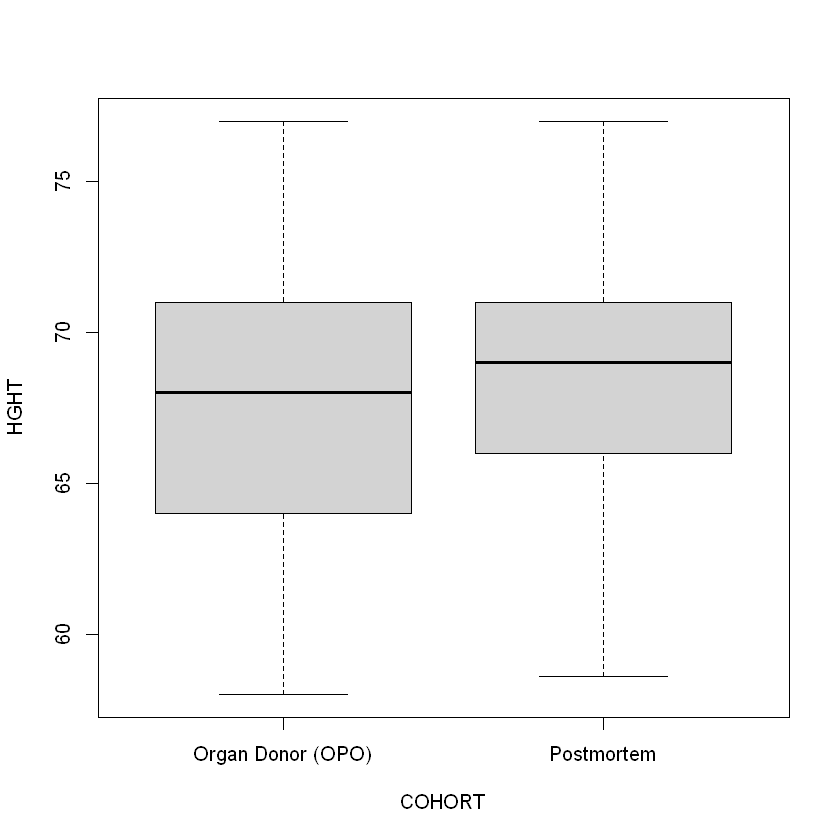

In [183]:
myAOV = aov(HGHT ~ COHORT, data=clinical_data)
summary(myAOV)
shapiro.test(residuals(myAOV))
bartlett.test(HGHT ~ COHORT, data=clinical_data)
kruskal.test(HGHT ~ COHORT, data=clinical_data)
boxplot(HGHT ~ COHORT, data=clinical_data)

             Df Sum Sq Mean Sq F value  Pr(>F)   
DTHHRDY       4    214   53.49   3.469 0.00875 **
Residuals   275   4241   15.42                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


	Shapiro-Wilk normality test

data:  residuals(myAOV)
W = 0.98808, p-value = 0.02083



	Bartlett test of homogeneity of variances

data:  HGHT by DTHHRDY
Bartlett's K-squared = 4.612, df = 4, p-value = 0.3295



	Kruskal-Wallis rank sum test

data:  HGHT by DTHHRDY
Kruskal-Wallis chi-squared = 12.113, df = 4, p-value = 0.01653


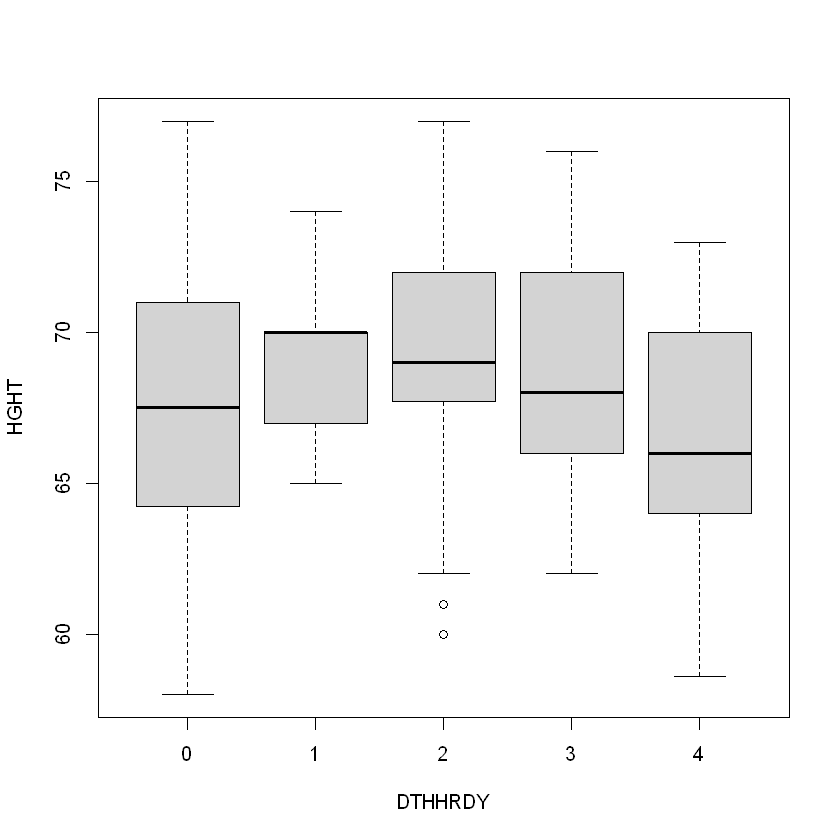

In [185]:
myAOV = aov(HGHT ~ DTHHRDY, data=clinical_data)
summary(myAOV)
shapiro.test(residuals(myAOV))
bartlett.test(HGHT ~ DTHHRDY, data=clinical_data)
kruskal.test(HGHT ~ DTHHRDY, data=clinical_data)
boxplot(HGHT ~ DTHHRDY, data=clinical_data)

             Df Sum Sq Mean Sq F value Pr(>F)
DTHVNT        2     56   28.24   1.778  0.171
Residuals   277   4398   15.88               


	Shapiro-Wilk normality test

data:  residuals(myAOV)
W = 0.98373, p-value = 0.002839



	Bartlett test of homogeneity of variances

data:  HGHT by DTHVNT
Bartlett's K-squared = 1.3677, df = 2, p-value = 0.5047



	Kruskal-Wallis rank sum test

data:  HGHT by DTHVNT
Kruskal-Wallis chi-squared = 4.0813, df = 2, p-value = 0.1299


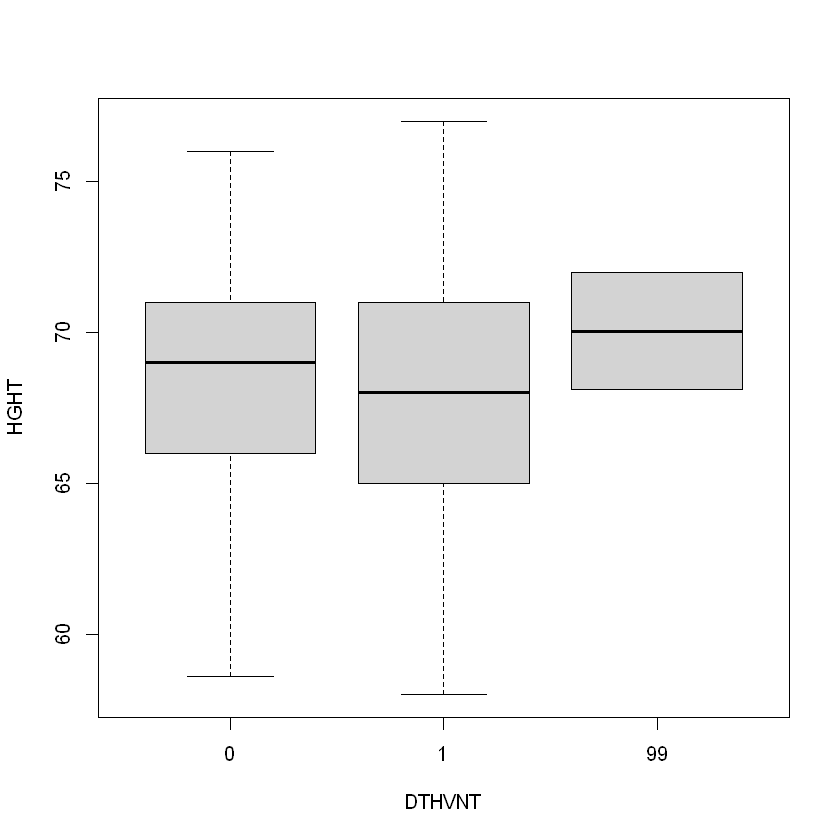

In [187]:
myAOV = aov(HGHT ~ DTHVNT, data=clinical_data)
summary(myAOV)
shapiro.test(residuals(myAOV))
bartlett.test(HGHT ~ DTHVNT, data=clinical_data)
kruskal.test(HGHT ~ DTHVNT, data=clinical_data)
boxplot(HGHT ~ DTHVNT, data=clinical_data)

#### 1.3.2.2 WGHT

             Df Sum Sq Mean Sq F value Pr(>F)    
SEX           1  74007   74007   83.01 <2e-16 ***
Residuals   278 247853     892                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


	Shapiro-Wilk normality test

data:  residuals(myAOV)
W = 0.99187, p-value = 0.1266



	Bartlett test of homogeneity of variances

data:  WGHT by SEX
Bartlett's K-squared = 0.96817, df = 1, p-value = 0.3251



	Kruskal-Wallis rank sum test

data:  WGHT by SEX
Kruskal-Wallis chi-squared = 65.369, df = 1, p-value = 6.21e-16


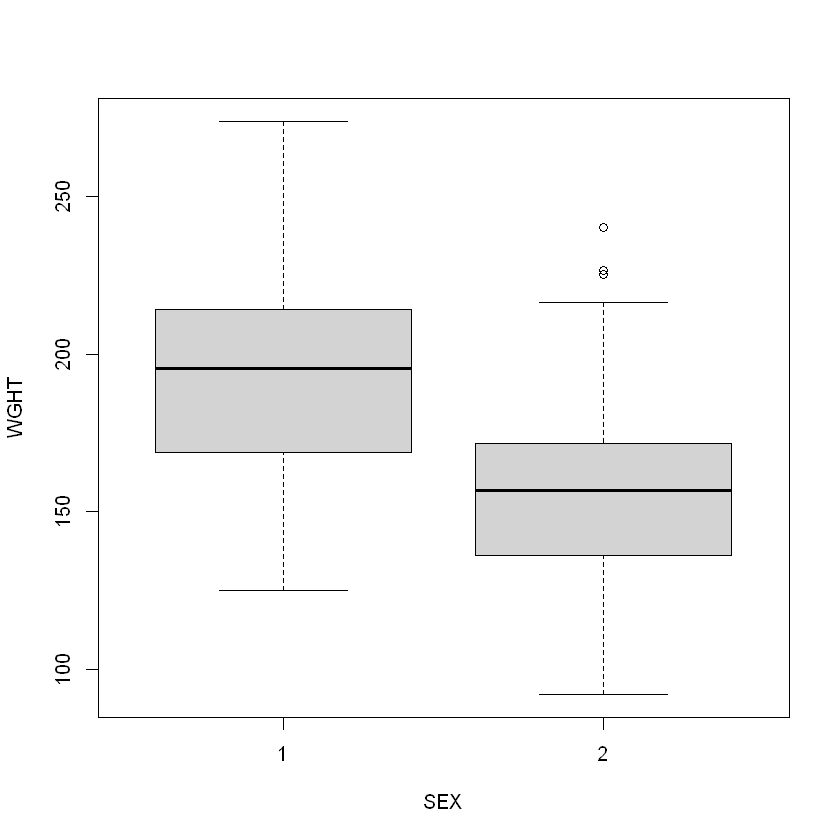

In [189]:
myAOV = aov(WGHT ~ SEX, data=clinical_data)
summary(myAOV)
shapiro.test(residuals(myAOV))
bartlett.test(WGHT ~ SEX, data=clinical_data)
kruskal.test(WGHT ~ SEX, data=clinical_data)
boxplot(WGHT ~ SEX, data=clinical_data)

             Df Sum Sq Mean Sq F value Pr(>F)  
COHORT        1   4383    4383   3.838 0.0511 .
Residuals   278 317477    1142                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


	Shapiro-Wilk normality test

data:  residuals(myAOV)
W = 0.99195, p-value = 0.1316



	Bartlett test of homogeneity of variances

data:  WGHT by COHORT
Bartlett's K-squared = 0.76425, df = 1, p-value = 0.382



	Kruskal-Wallis rank sum test

data:  WGHT by COHORT
Kruskal-Wallis chi-squared = 4.1733, df = 1, p-value = 0.04107


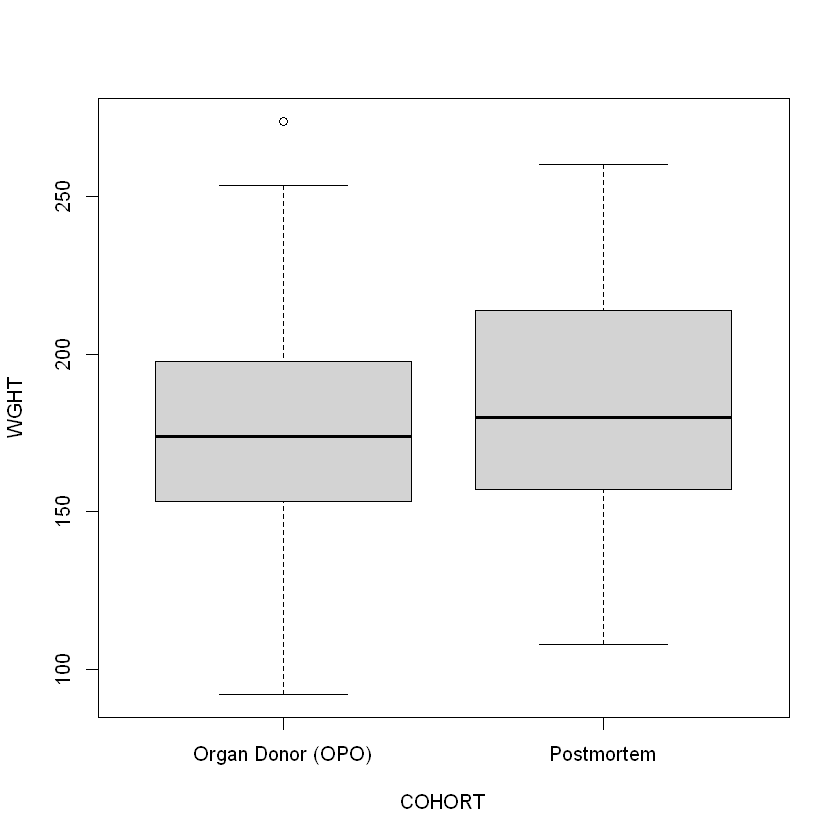

In [190]:
myAOV = aov(WGHT ~ COHORT, data=clinical_data)
summary(myAOV)
shapiro.test(residuals(myAOV))
bartlett.test(WGHT ~ COHORT, data=clinical_data)
kruskal.test(WGHT ~ COHORT, data=clinical_data)
boxplot(WGHT ~ COHORT, data=clinical_data)

In [ ]:
#### 1.3.2.3 TRISCHD

             Df   Sum Sq  Mean Sq F value Pr(>F)    
COHORT        1 22633790 22633790   315.7 <2e-16 ***
Residuals   278 19932888    71701                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


	Shapiro-Wilk normality test

data:  residuals(myAOV)
W = 0.86131, p-value = 3.66e-15



	Bartlett test of homogeneity of variances

data:  TRISCHD by COHORT
Bartlett's K-squared = 0.15527, df = 1, p-value = 0.6936



	Kruskal-Wallis rank sum test

data:  TRISCHD by COHORT
Kruskal-Wallis chi-squared = 173.68, df = 1, p-value < 2.2e-16


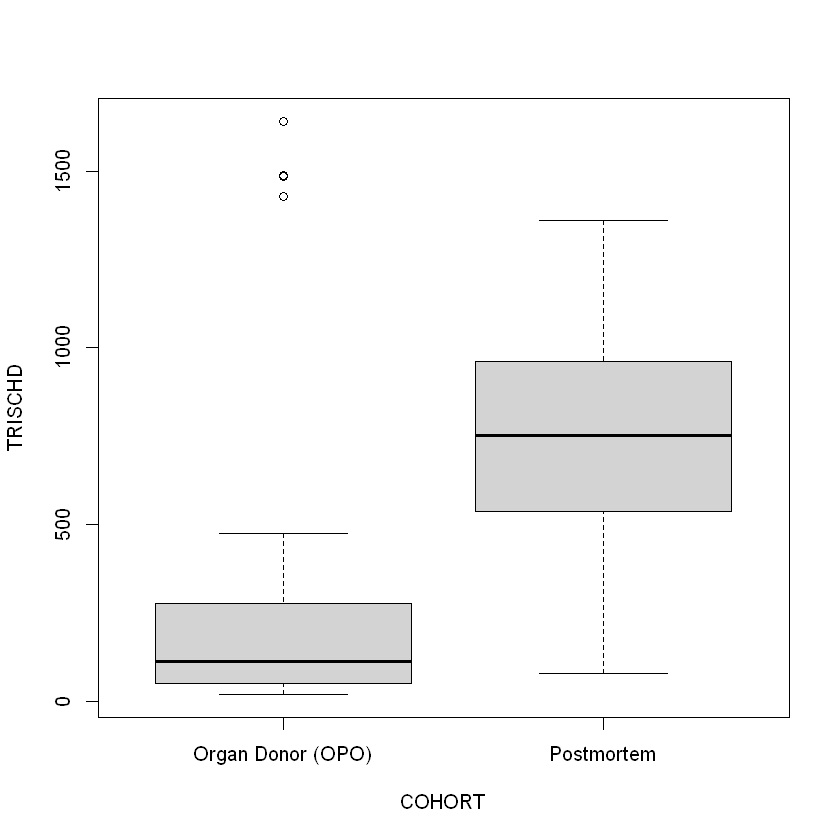

In [224]:
myAOV = aov(TRISCHD ~ COHORT, data=clinical_data)
summary(myAOV)
shapiro.test(residuals(myAOV))
bartlett.test(TRISCHD ~ COHORT, data=clinical_data)
kruskal.test(TRISCHD ~ COHORT, data=clinical_data)
boxplot(TRISCHD ~ COHORT, data=clinical_data)

In [186]:
head(clinical_data, 1)

SMPLID,SUBJID,COHORT,SEX,AGE,HGHT,WGHT,BMI,TRISCHD,DTHVNT,DTHHRDY,SMPLID.1,IMGURL
<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
GTEX.111YS.0526,GTEX.111YS,Organ Donor (OPO),1,62,72,227,30.78,74,1,0,GTEX-111YS-0525,https://brd.nci.nih.gov/brd/specimen/GTEX-111YS-0526


## 1.3.3 Correlations between categorical variables

4 categorical variables are SEX, COHORT, DTHHRDY and DTHVNT.

The idea is to perform a chi-squared test to see if two categorical variables are independant i.e they are "correlated to each other". They are 3 + 2 + 1 = 7 possible combinations to compare the categorical variables.

### 1.3.3.1 SEX

In [201]:
# Contingency table
cont_table <- table(clinical_data$SEX, clinical_data$COHORT)
cont_table
# Chi-squared test
chisq.test(cont_table)

   
    Organ Donor (OPO) Postmortem
  1                88         92
  2                55         45


	Pearson's Chi-squared test with Yates' continuity correction

data:  cont_table
X-squared = 0.73176, df = 1, p-value = 0.3923


In [202]:
# Contingency table
cont_table <- table(clinical_data$SEX, clinical_data$DTHHRDY)
cont_table
# Chi-squared test
chisq.test(cont_table)

   
     0  1  2  3  4
  1 96  3 60  9 12
  2 60  5 17  4 14

Warning message in chisq.test(cont_table):
"L’approximation du Chi-2 est peut-être incorrecte"



	Pearson's Chi-squared test

data:  cont_table
X-squared = 13.111, df = 4, p-value = 0.01075


In [203]:
# Contingency table
cont_table <- table(clinical_data$SEX, clinical_data$DTHVNT)
cont_table
# Chi-squared test
chisq.test(cont_table)

   
      0   1  99
  1  77 101   2
  2  39  61   0

Warning message in chisq.test(cont_table):
"L’approximation du Chi-2 est peut-être incorrecte"



	Pearson's Chi-squared test

data:  cont_table
X-squared = 1.5981, df = 2, p-value = 0.4497


### 1.3.3.2 COHORT

In [207]:
# Contingency table
cont_table <- table(clinical_data$COHORT, clinical_data$DTHHRDY)
cont_table
# Chi-squared test
chisq.test(cont_table)

                   
                      0   1   2   3   4
  Organ Donor (OPO) 142   1   0   0   0
  Postmortem         14   7  77  13  26

Warning message in chisq.test(cont_table):
"L’approximation du Chi-2 est peut-être incorrecte"



	Pearson's Chi-squared test

data:  cont_table
X-squared = 225.5, df = 4, p-value < 2.2e-16


In [209]:
# Contingency table
cont_table <- table(clinical_data$COHORT, clinical_data$DTHVNT)
cont_table
# Chi-squared test
chisq.test(cont_table)

                   
                      0   1  99
  Organ Donor (OPO)   0 143   0
  Postmortem        116  19   2

Warning message in chisq.test(cont_table):
"L’approximation du Chi-2 est peut-être incorrecte"



	Pearson's Chi-squared test

data:  cont_table
X-squared = 212.88, df = 2, p-value < 2.2e-16


### 1.3.3.3 DTHHRDY

In [211]:
# Contingency table
cont_table <- table(clinical_data$DTHHRDY, clinical_data$DTHVNT)
cont_table
# Chi-squared test
chisq.test(cont_table)

   
      0   1  99
  0   0 156   0
  1   7   1   0
  2  73   3   1
  3  11   2   0
  4  25   0   1

Warning message in chisq.test(cont_table):
"L’approximation du Chi-2 est peut-être incorrecte"



	Pearson's Chi-squared test

data:  cont_table
X-squared = 260.11, df = 8, p-value < 2.2e-16


# 1.4 Are there technical variables cofounding demographic/health variables ?

In [222]:
library(ggplot2)

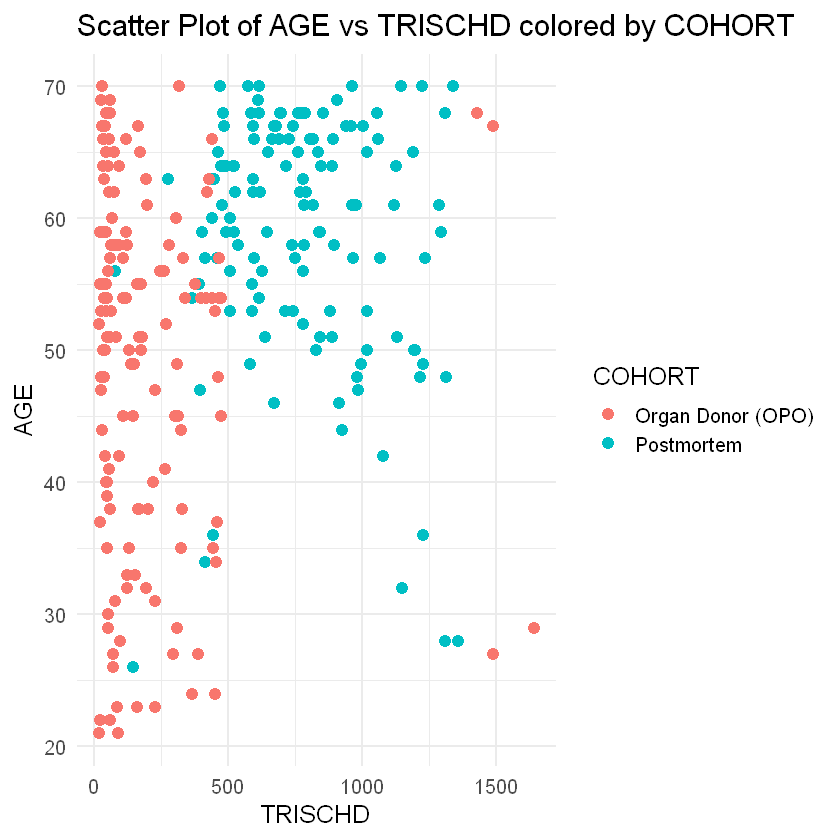

In [223]:
# Create the plot
ggplot(clinical_data, aes(x = TRISCHD, y = AGE, color = COHORT)) +
  geom_point(size = 3) +
  labs(title = "Scatter Plot of AGE vs TRISCHD colored by COHORT",
       x = "TRISCHD",
       y = "AGE",
       color = "COHORT") +
  theme_minimal(15)

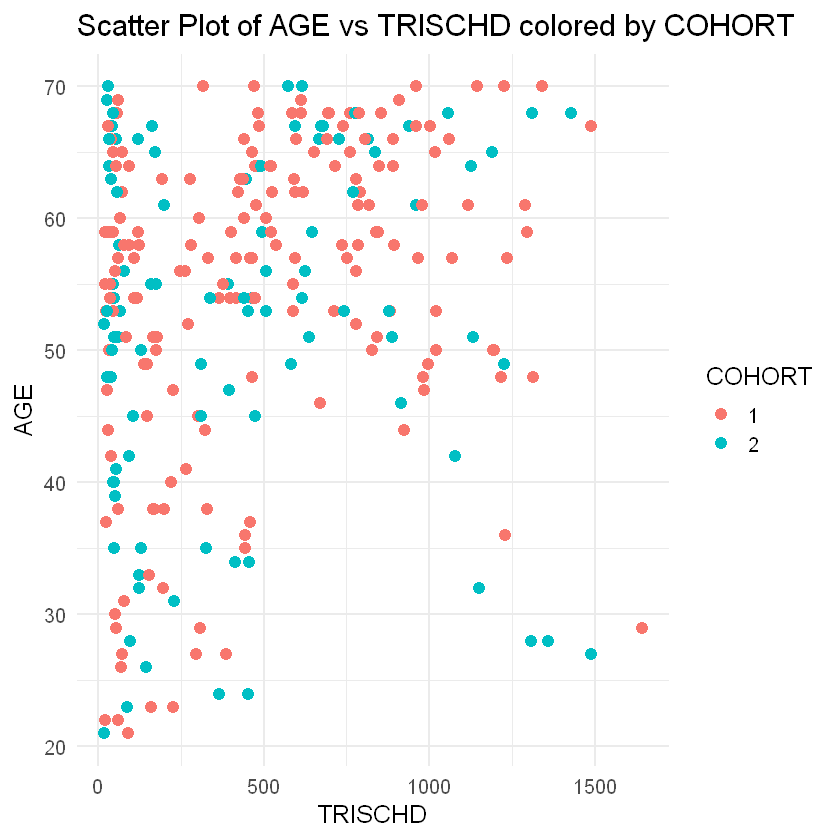

In [229]:
# Create the plot
ggplot(clinical_data, aes(x = TRISCHD, y = AGE, color = SEX)) +
  geom_point(size = 3) +
  labs(title = "Scatter Plot of AGE vs TRISCHD colored by COHORT",
       x = "TRISCHD",
       y = "AGE",
       color = "COHORT") +
  theme_minimal(15)

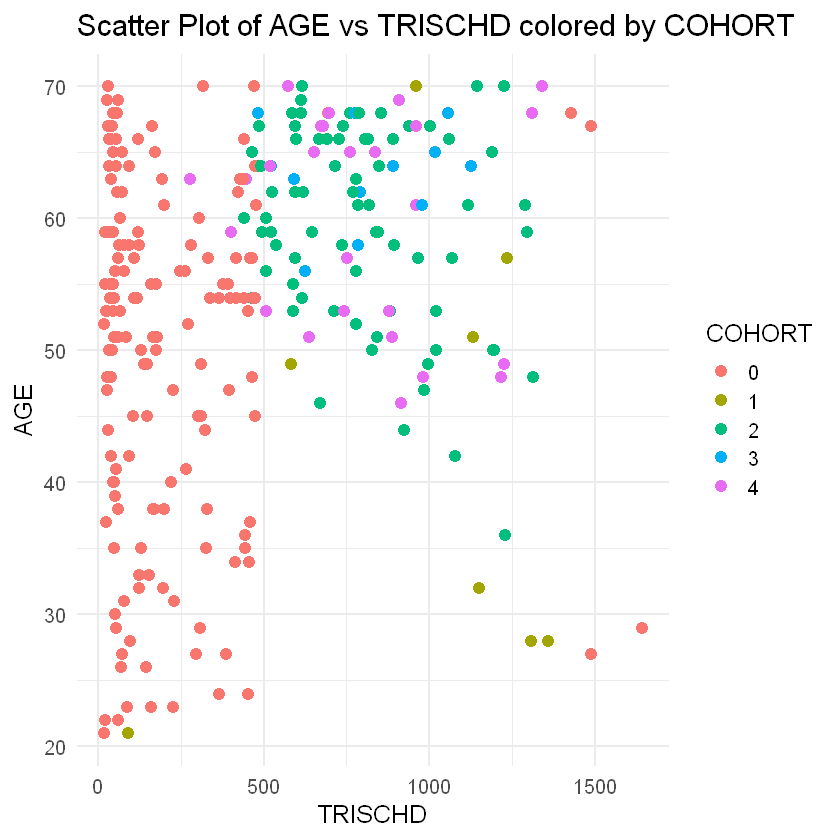

In [227]:
# Create the plot
ggplot(clinical_data, aes(x = TRISCHD, y = AGE, color = DTHHRDY)) +
  geom_point(size = 3) +
  labs(title = "Scatter Plot of AGE vs TRISCHD colored by COHORT",
       x = "TRISCHD",
       y = "AGE",
       color = "COHORT") +
  theme_minimal(15)

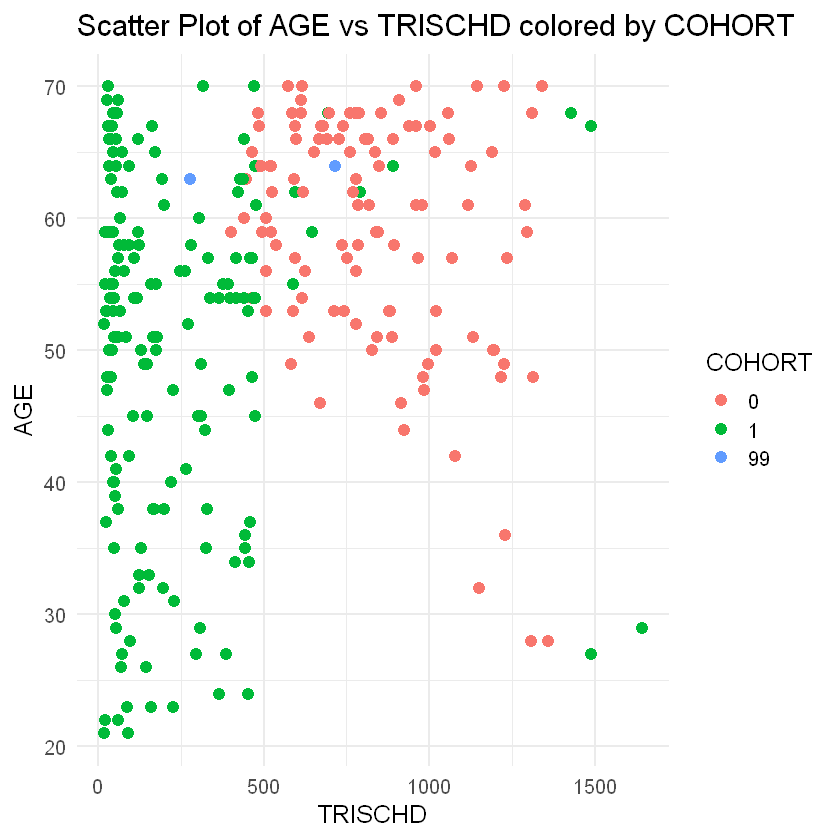

In [228]:
# Create the plot
ggplot(clinical_data, aes(x = TRISCHD, y = AGE, color = DTHVNT)) +
  geom_point(size = 3) +
  labs(title = "Scatter Plot of AGE vs TRISCHD colored by COHORT",
       x = "TRISCHD",
       y = "AGE",
       color = "COHORT") +
  theme_minimal(15)

### RNA read counts data

In [31]:
#import TSV file into data frame
RNA_read_counts_data <- read_tsv('Aorta/RNA_read_counts.tsv')

Rows: 56200 Columns: 282
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr   (2): Name, Description
dbl (280): GTEX.111YS.0526, GTEX.1122O.1126, GTEX.1128S.0326, GTEX.117XS.042...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [32]:
head(RNA_read_counts_data)

Name,Description,GTEX.111YS.0526,GTEX.1122O.1126,GTEX.1128S.0326,GTEX.117XS.0426,GTEX.117YW.0226,GTEX.11DXX.0426,GTEX.11DXZ.0426,GTEX.11DYG.1226,⋯,GTEX.1R9K5.1426,GTEX.1R9PM.0326,GTEX.1R9PN.0226,GTEX.1R9PO.0226,GTEX.1RAZA.1126,GTEX.1RAZR.0626,GTEX.1RNTQ.0726,GTEX.1RQED.1126,GTEX.1S3DN.0626,GTEX.1S5ZA.1126
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000223972.5,DDX11L1,0,0,0,0,0,5,0,0,⋯,1,0,0,3,0,0,0,0,0,1
ENSG00000227232.5,WASH7P,78,70,180,78,152,76,132,143,⋯,134,142,140,69,183,61,157,103,57,70
ENSG00000278267.1,MIR6859-1,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,1,0,0,0
ENSG00000243485.5,MIR1302-2HG,0,0,1,0,0,0,0,0,⋯,0,0,0,1,0,0,1,0,0,0
ENSG00000237613.2,FAM138A,1,0,0,1,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
ENSG00000268020.3,OR4G4P,1,0,0,1,0,0,2,0,⋯,0,0,0,0,0,0,0,0,0,0


In [25]:
summary(RNA_read_counts_data)

     Name           Description        GTEX.111YS.0526     GTEX.1122O.1126    
 Length:56200       Length:56200       Min.   :      0.0   Min.   :      0.0  
 Class :character   Class :character   1st Qu.:      0.0   1st Qu.:      0.0  
 Mode  :character   Mode  :character   Median :      0.0   Median :      0.0  
                                       Mean   :    905.4   Mean   :    856.6  
                                       3rd Qu.:     59.0   3rd Qu.:     49.0  
                                       Max.   :1103024.0   Max.   :1619435.0  
 GTEX.1128S.0326  GTEX.117XS.0426  GTEX.117YW.0226  GTEX.11DXX.0426   
 Min.   :     0   Min.   :     0   Min.   :     0   Min.   :     0.0  
 1st Qu.:     0   1st Qu.:     0   1st Qu.:     0   1st Qu.:     0.0  
 Median :     1   Median :     1   Median :     1   Median :     0.0  
 Mean   :  1036   Mean   :  1083   Mean   :  1071   Mean   :   883.1  
 3rd Qu.:    96   3rd Qu.:    63   3rd Qu.:    85   3rd Qu.:    69.0  
 Max.   :816182   Max

In [26]:
dim(RNA_read_counts_data)

[1] 56200   282

In [27]:
# Convert character columns to factors using dplyr
RNA_read_counts_data <- RNA_read_counts_data %>%
  mutate_if(is.character, as.factor)

In [29]:
summary(RNA_read_counts_data)

                 Name            Description    GTEX.111YS.0526    
 ENSG00000000003.14:    1   Y_RNA      :  738   Min.   :      0.0  
 ENSG00000000005.5 :    1   Metazoa_SRP:  167   1st Qu.:      0.0  
 ENSG00000000419.12:    1   U3         :   50   Median :      0.0  
 ENSG00000000457.13:    1   U6         :   33   Mean   :    905.4  
 ENSG00000000460.16:    1   snoU13     :   32   3rd Qu.:     59.0  
 ENSG00000000938.12:    1   uc_338     :   32   Max.   :1103024.0  
 (Other)           :56194   (Other)    :55148                      
 GTEX.1122O.1126     GTEX.1128S.0326  GTEX.117XS.0426  GTEX.117YW.0226 
 Min.   :      0.0   Min.   :     0   Min.   :     0   Min.   :     0  
 1st Qu.:      0.0   1st Qu.:     0   1st Qu.:     0   1st Qu.:     0  
 Median :      0.0   Median :     1   Median :     1   Median :     1  
 Mean   :    856.6   Mean   :  1036   Mean   :  1083   Mean   :  1071  
 3rd Qu.:     49.0   3rd Qu.:    96   3rd Qu.:    63   3rd Qu.:    85  
 Max.   :1619435.0   Max

### 1.3 Morphological data